In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pip install obspy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.4 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.42
    Uninstalling SQLAlchemy-2.0.42:
      Successfully uninstalled SQLAlchemy-2.0.42
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.54 which is incompatible.


In [3]:
!pip install segyio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 2.5 MB/s eta 0:00:00


Shape: (626, 15000)


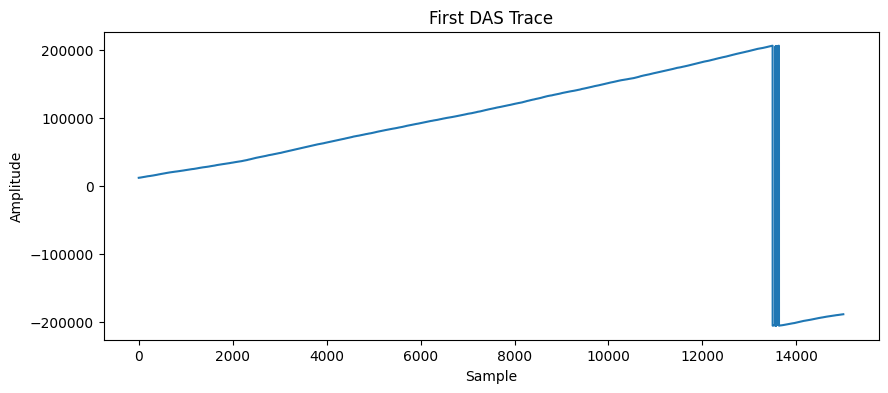

In [ ]:
import segyio
import numpy as np
import matplotlib.pyplot as plt

# Open file without geometry interpretation
with segyio.open("cbt_processed_20190101_000104.511+0000.sgy", "r", ignore_geometry=True) as f:
    # Read all traces into NumPy array
    traces = np.array([tr for tr in f.trace])
    print("Shape:", traces.shape)  # (n_traces, n_samples)

    # Plot the first trace
    plt.figure(figsize=(10,4))
    plt.plot(traces[0])
    plt.title("First DAS Trace")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.show()


In [ ]:
print(traces)

[[  11659.469   11660.269   11664.659 ... -189026.42  -189012.1
  -189011.47 ]
 [  84803.484   84826.08    84854.73  ... -150365.9   -150355.56
  -150351.05 ]
 [  11659.469   11660.269   11664.659 ... -189026.42  -189012.1
  -189011.47 ]
 ...
 [  84803.484   84826.08    84854.73  ... -150365.9   -150355.56
  -150351.05 ]
 [  11659.469   11660.269   11664.659 ... -189026.42  -189012.1
  -189011.47 ]
 [  84803.484   84826.08    84854.73  ... -150365.9   -150355.56
  -150351.05 ]]


In [ ]:
import segyio

filename = "cbt_processed_20190101_000104.511+0000.sgy"

with segyio.open(filename, "r", ignore_geometry=True) as f:
    # Text header
    print(segyio.tools.wrap(f.text[0]))

    # Binary header
    print(f.bin)

    # Example: First trace header
    print(f.header[0])


C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
{JobID: 1, LineNumber: 1, ReelNumber: 1, Traces: 0, AuxTraces: 0, Interval: 20000, IntervalOriginal: 0, Samples: 15000, SamplesOriginal: 0, Format: 5, EnsembleFold: 0, SortingCode: 0, VerticalSum: 0, SweepFrequencyStart: 0, SweepFrequencyEnd: 0, SweepLength: 0, Sweep: 0, SweepChannel: 0, SweepTaperStart: 0, SweepTaperEnd: 0, Taper: 0, CorrelatedTraces: 0, BinaryGainRecovery: 0, AmplitudeRecovery: 0, MeasurementSystem: 0, ImpulseSignalPolarity: 0, VibratoryPolarity: 0, ExtAuxTraces: 0, ExtSamples: 0, ExtSamplesOriginal: 0, ExtEnsembleFold: 0, SEGYRevision: 1, SEGYRevisionMinor: 80, TraceFlag: 0, ExtendedHeaders: 0}
{TRACE_SEQUENCE_LINE: 1, TRACE_SEQUENCE_FILE: 1, FieldRecord: 101000104, TraceNumber: 1, EnergySourcePoint: 0, CDP: 0, CDP_TRACE: 0, TraceIdentificationCode: 1, NSummedTraces: 0, NStackedTraces: 0, DataUse: 0, offset: 0, ReceiverGroupElevation: -885087, SourceSurfaceElevation: 0, SourceDepth: 0, R

Samples: 15000
Duration: 300.00 seconds
Amplitude range: -205885.0 to 205878.5625
Sampling frequency: 50.0 Hz


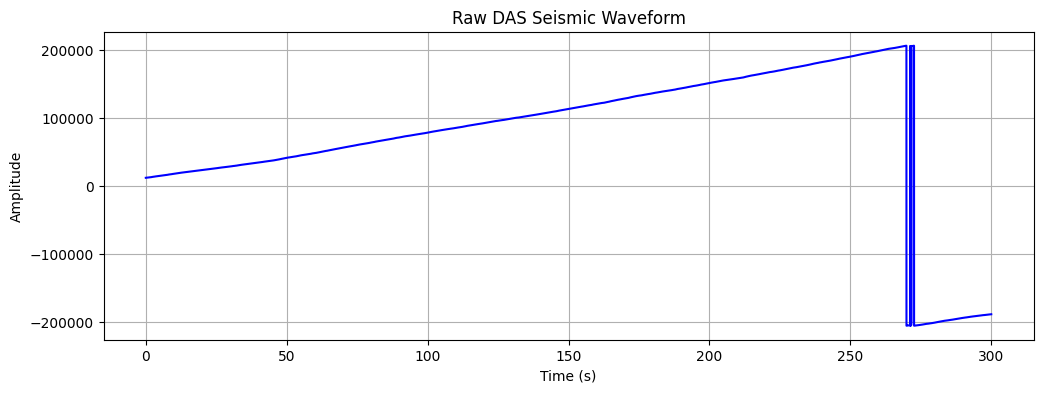

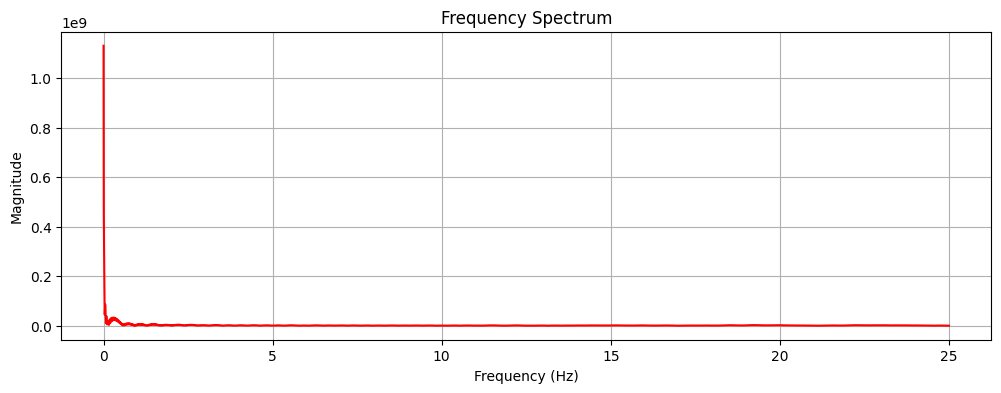

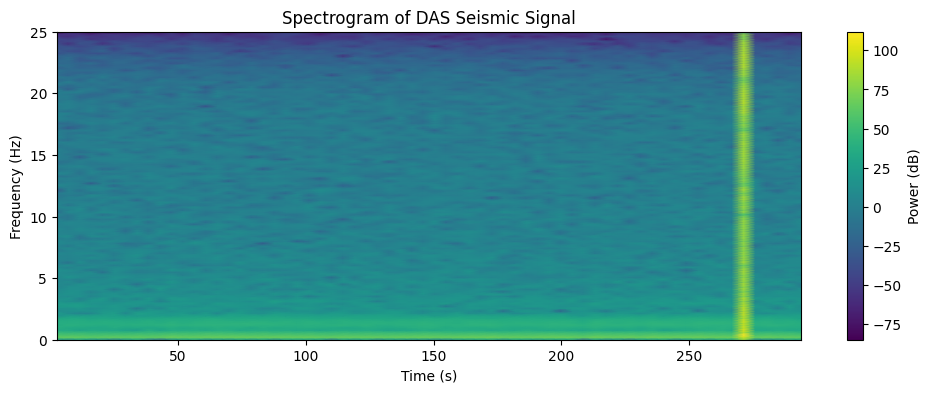

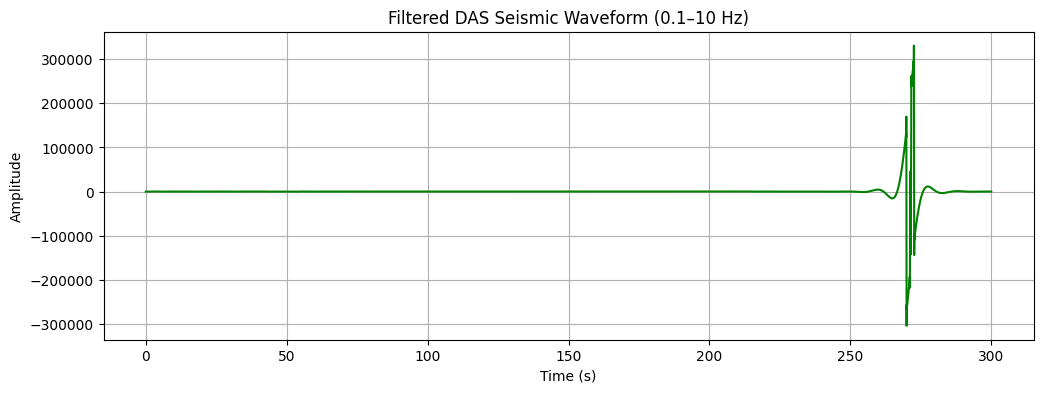

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import segyio
from scipy.signal import spectrogram, butter, filtfilt

# === Load the seismic SEG-Y file ===
file_path = "cbt_processed_20190101_000104.511+0000.sgy"

with segyio.open(file_path, "r", ignore_geometry=True) as f:
    traces = np.array([tr for tr in f.trace])
    trace = traces[0]  # First trace
    sample_interval_sec = f.bin[segyio.BinField.Interval] / 1e6  # in seconds

# Convert to sampling frequency in Hz
fs = 1 / sample_interval_sec

# === Metadata ===
n_samples = len(trace)
duration = n_samples * sample_interval_sec
print(f"Samples: {n_samples}")
print(f"Duration: {duration:.2f} seconds")
print(f"Amplitude range: {trace.min()} to {trace.max()}")
print(f"Sampling frequency: {fs} Hz")

# === Time axis ===
time = np.linspace(0, duration, n_samples)

# === Plot: Raw waveform ===
plt.figure(figsize=(12, 4))
plt.plot(time, trace, color='blue')
plt.title("Raw DAS Seismic Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# === Frequency domain analysis ===
freqs = np.fft.rfftfreq(n_samples, d=sample_interval_sec)
fft_magnitude = np.abs(np.fft.rfft(trace))

plt.figure(figsize=(12, 4))
plt.plot(freqs, fft_magnitude, color='red')
plt.title("Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

# === Spectrogram ===
f_spec, t_spec, Sxx = spectrogram(trace, fs=fs, nperseg=256)
plt.figure(figsize=(12, 4))
plt.pcolormesh(t_spec, f_spec, 10*np.log10(Sxx), shading='gouraud')
plt.colorbar(label='Power (dB)')
plt.title("Spectrogram of DAS Seismic Signal")
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (s)")
plt.show()

# === Bandpass filter function ===
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

# Filter in 0.1–10 Hz range
filtered_trace = bandpass_filter(trace, 0.1, 10, fs=fs)

plt.figure(figsize=(12, 4))
plt.plot(time, filtered_trace, color='green')
plt.title("Filtered DAS Seismic Waveform (0.1–10 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()
